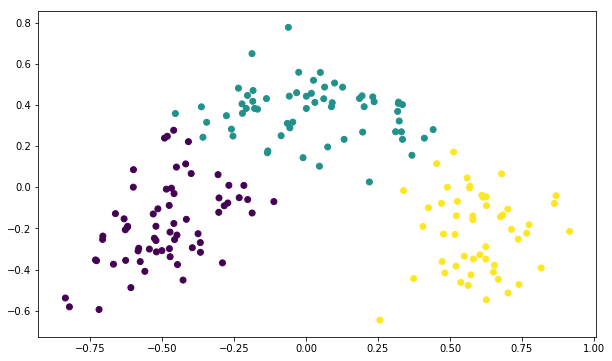

In [2]:
import sklearn.

import sklearn.cluster
import matplotlib.pyplot as plt
import numpy as np

def main():
    X, attributes = input_data()
    X = normalize(X)
    pca, pca_array = run_PCA(X, 2)
    labels = kmeans(pca_array, 3, [0, 1, 2])
    visualize_2d_wine(pca_array, labels)

def input_data():
    X = []
    attributes = []
    
    with open('data/wine.csv') as fp:
        for line in fp:
            X.append([float(x) for x in line.strip().split(',')])
    
    with open('data/attributes.txt') as fp:
        attributes = [x.strip() for x in fp.readlines()]

    return np.array(X), attributes

def run_PCA(X, num_components):
    pca = sklearn.decomposition.PCA(n_components=num_components)
    pca.fit(X)
    pca_array = pca.transform(X)

    return pca, pca_array

def kmeans(X, num_clusters, initial_centroid_indices):
    import time
    
    N = len(X)
    centroids = X[initial_centroid_indices]
    labels = np.zeros(N)
    
    while True:
        '''
        Step 1. 각 데이터 포인트 i 에 대해 가장 가까운
        중심점을 찾고, 그 중심점에 해당하는 클러스터를 할당하여
        labels[i]에 넣습니다.
        가까운 중심점을 찾을 때는, 유클리드 거리를 사용합니다.
        미리 정의된 distance 함수를 사용합니다.
        '''
        is_changed = False
        for i in range(N):
            distances = []
            for k in range(num_clusters):
                #X[i] 와 centroids[k]
                k_dist = distance(X[i], centroids[k])
                distances.append(k_dist)
            
            if labels[i] != np.argmin(distances):
                is_changed = True
            labels[i] = np.argmin(distances)

        '''
        Step 2. 할당된 클러스터를 기반으로 새로운 중심점을 계산합니다.
        중심점은 클러스터 내 데이터 포인트들의 위치의 *산술 평균*
        으로 합니다.
        '''
        for k in  range(num_clusters):
            x = X[labels == k][:,0]
            y = X[labels == k][:,1]
            
            x = np.mean(x)
            y = np.mean(y)
            centroids[k] = [x, y]
        
        
        '''
        Step 3. 만약 클러스터의 할당이 바뀌지 않았다면 알고리즘을 끝냅니다.
        아니라면 다시 반복합니다.
        '''
        if not is_changed:
            break
            
    return labels

def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
    
def normalize(X):
    for dim in range(len(X[0])):
        X[:, dim] -= np.min(X[:, dim])
        X[:, dim] /= np.max(X[:, dim])
    return X

'''
이전에 더해, 각각의 데이터 포인트에 색을 입히는 과정도 진행합니다.
'''

def visualize_2d_wine(X, labels):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:,0],X[:,1], c=labels)
    plt.show()
if __name__ == '__main__':
    main()
